In [135]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [136]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [137]:
Config().data_path()

PosixPath('/home/paperspace/.fastai/data')

Set the variable `path` to `Config().data_path()/'rossmann'`.

In [138]:
path = Config().data_path()/'rossmann'

Set `train_df` to the pickled dataset at `path/'train_clean'`.

In [139]:
train_df = pd.read_pickle(path/'train_clean')

Show a transposed output of `train_df`.

In [140]:
train_df.T

,1,2,3,4,6,7,8,9,10,11,...,1017198,1017199,1017200,1017201,1017202,1017204,1017205,1017206,1017207,1017208
Store,1,1,1,1,1,1,1,1,1,1,...,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
DayOfWeek,3,4,5,6,1,2,3,4,5,6,...,2,3,4,5,6,1,2,3,4,5
Date,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,2013-01-11 00:00:00,2013-01-12 00:00:00,...,2015-07-21 00:00:00,2015-07-22 00:00:00,2015-07-23 00:00:00,2015-07-24 00:00:00,2015-07-25 00:00:00,2015-07-27 00:00:00,2015-07-28 00:00:00,2015-07-29 00:00:00,2015-07-30 00:00:00,2015-07-31 00:00:00
Sales,5530,4327,4486,4997,7176,5580,5471,4892,4881,4952,...,5074,5342,6150,5816,6897,10712,8093,7661,8405,8680
Customers,668,578,619,635,785,654,626,615,592,646,...,352,382,435,417,478,608,500,473,502,538
Open,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Promo,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,1,1,1,1,1
StateHoliday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SchoolHoliday,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,True,True,True,True
Year,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


Set the len of `train_df` to `n`, and print it out.

In [141]:
n = len(train_df); n

844338

### Experimenting with a sample

Set `idx` to a random permutation of `range(n)` up to the 2000th position.

In [142]:
idx = np.random.permutation(range(n))[:2000]

In [45]:
idx[:10]

array([448593, 539144, 391897, 263116, 250527, 327256, 435547, 528682, 734225,  74301])

Sort `idx`.

In [143]:
idx = sorted(idx)

In [144]:
idx[:10]

[122, 303, 1142, 1808, 2049, 2275, 3004, 3163, 3427, 3463]

Set `small_train_df` to be `train_df` up to the 1000th value in `idx`.

In [145]:
small_train_df = train_df.loc[idx[:1000],:]

/home/paperspace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Set `small_test_df` to be `train_df` from the 1000th value on in `idx`.

In [146]:
small_test_df = train_df.loc[idx[1000:], :]

/home/paperspace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Set `small_cont_vars` to `['CompetitionDistance', 'Mean_Humidity']`

In [147]:
small_cont_vars = ['CompetitionDistance', 'MeanHumidity']

Set `small_cat_vars` to `['Store', 'DayOfWeek', 'PromoInterval']`.

In [148]:
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']

Make `small_train_df` and `small_test_df` have only those variables.

In [149]:
small_train_df = small_train_df.loc[:, small_cont_vars + small_cat_vars + ['Sales']]

/home/paperspace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [150]:
small_test_df = small_test_df.loc[:, small_cont_vars + small_cat_vars]

/home/paperspace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Show `small_train_df`'s first few rows.

In [151]:
small_train_df.head(25)

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales
122,1270.0,NaN,1.0,5.0,NaN,6027.0
303,1270.0,NaN,1.0,4.0,NaN,4035.0
1142,570.0,NaN,2.0,6.0,"Jan,Apr,Jul,Oct",2670.0
1808,NaN,NaN,NaN,NaN,NaN,NaN
2049,14130.0,NaN,3.0,6.0,"Jan,Apr,Jul,Oct",4330.0
2275,14130.0,NaN,3.0,1.0,"Jan,Apr,Jul,Oct",4602.0
3004,620.0,NaN,4.0,5.0,NaN,9674.0
3163,620.0,NaN,4.0,3.0,NaN,10379.0
3427,620.0,NaN,4.0,1.0,NaN,10919.0
3463,620.0,NaN,4.0,2.0,NaN,12659.0


Same with `small_test_df`.

In [152]:
small_test_df.head(25)

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval
421082,44320.0,NaN,462.0,2.0,NaN
421358,44320.0,NaN,462.0,5.0,NaN
421503,44320.0,NaN,462.0,3.0,NaN
422751,520.0,NaN,464.0,4.0,NaN
423148,520.0,NaN,464.0,2.0,NaN
423164,520.0,NaN,464.0,4.0,NaN
423254,520.0,NaN,464.0,3.0,NaN
423573,NaN,NaN,NaN,NaN,NaN
424423,10890.0,NaN,465.0,6.0,NaN
424890,NaN,NaN,NaN,NaN,NaN


Instantiate a `Categorify` with `small_cat_vars` and `small_cont_vars` and call it `categorify`. Call `categorify` on `small_train_df`. Do it again on `small_test_df` with `test=True`.

In [153]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

Show the first few rows of `small_test_df`.

In [154]:
small_test_df[:10]

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval
421082,44320.0,NaN,NaN,2.0,NaN
421358,44320.0,NaN,NaN,5.0,NaN
421503,44320.0,NaN,NaN,3.0,NaN
422751,520.0,NaN,NaN,4.0,NaN
423148,520.0,NaN,NaN,2.0,NaN
423164,520.0,NaN,NaN,4.0,NaN
423254,520.0,NaN,NaN,3.0,NaN
423573,NaN,NaN,NaN,NaN,NaN
424423,10890.0,NaN,NaN,6.0,NaN
424890,NaN,NaN,NaN,NaN,NaN


Show the categories from `small_train_df.PromoInterval`.

In [155]:
small_train_df['PromoInterval']

122                   NaN
303                   NaN
1142      Jan,Apr,Jul,Oct
1808                  NaN
2049      Jan,Apr,Jul,Oct
2275      Jan,Apr,Jul,Oct
3004                  NaN
3163                  NaN
3427                  NaN
3463                  NaN
3621                  NaN
3656                  NaN
3741                  NaN
4892                  NaN
5795                  NaN
6249                  NaN
6255                  NaN
6693                  NaN
7642                  NaN
7664                  NaN
7756                  NaN
7979                  NaN
8108                  NaN
8542                  NaN
8549                  NaN
8890                  NaN
9090                  NaN
9215                  NaN
9506      Jan,Apr,Jul,Oct
9743      Jan,Apr,Jul,Oct
               ...       
411493    Jan,Apr,Jul,Oct
411909    Feb,May,Aug,Nov
412269    Feb,May,Aug,Nov
413167                NaN
413192                NaN
413474                NaN
413484                NaN
413925      

Show the `small_train_df` column.

In [156]:
small_train_df.head()

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales
122,1270.0,NaN,1.0,5.0,NaN,6027.0
303,1270.0,NaN,1.0,4.0,NaN,4035.0
1142,570.0,NaN,2.0,6.0,"Jan,Apr,Jul,Oct",2670.0
1808,NaN,NaN,NaN,NaN,NaN,NaN
2049,14130.0,NaN,3.0,6.0,"Jan,Apr,Jul,Oct",4330.0


Show the first 5 categorical codes from `small_train_df['PromoInterval']`.

In [157]:
small_train_df['PromoInterval'].cat.categories[:5]

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

Instantiate a `FillMissing` object in the same way, and call it `fill_missing`. Call it like a function applied to `small_train_df` and `small_test_df`.

In [158]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df)

A new column, `CompetitionDistance_na` exists on the train dataframe. Show the rows where it's `True`.

In [159]:
small_train_df[small_train_df['CompetitionDistance_na']]

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales,CompetitionDistance_na,MeanHumidity_na
1808,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
3741,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
7664,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
8108,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
9831,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
13366,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
14588,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
18139,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
26704,2640.0,NaN,NaN,NaN,NaN,NaN,True,True
28154,2640.0,NaN,NaN,NaN,NaN,NaN,True,True


### Preparing full data set

Read the full `train_clean` to `train_df`.

In [160]:
train_df = pd.read_pickle(path/'train_clean')

Read the full `test_clean` to `test_df`.

In [161]:
test_df = pd.read_pickle(path/'test')

Print out `len(train_df)` and `len(test_df)`.

In [162]:
len(train_df)

844338

In [163]:
len(test_df)

41088

Set our `procs` to `FillMissing`, `Categorify`, and `Normalize`.

In [164]:
procs = [FillMissing, Categorify, Normalize]

This:
```
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']
```

In [177]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fwd', 'Promo_bwd', 'StateHoliday_fwd', 'StateHoliday_bwd',
    'SchoolHoliday_fwd', 'SchoolHoliday_bwd']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [178]:
dep_var = 'Sales'

Set `dep_var` to `Sales`.

Constrain the columns in `df` to `cat_vars`, `cont_vars`, `dep_var`, and `Date`.

In [179]:
train_df = train_df.loc[:, cat_vars + cont_vars + [dep_var, 'Date']]

/home/paperspace/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Show the `min` and `max` `Date`.

In [180]:
train_df.Date.min()

Timestamp('2013-01-01 00:00:00')

In [181]:
train_df.Date.max()

Timestamp('2015-07-31 00:00:00')

Show the length of `test_df`.

In [182]:
len(test_df)

41088

Create a variable `cut` that represents the cutoff point before which all rows will be part of the validation set. The logic here is that we want it to be about as big as the test set, but that it should be comprised of all complete days that don't exist in the training set. You'll want to get the maximum index of the rows sharing the date found at the `len(test_df)`th row of the training set. In other words: find the date at `len(test_df)` and find the _last_ index in the training set that shares that date.

In [183]:
train_df['Date'][len(test_df)]

Timestamp('2015-01-15 00:00:00')

In [184]:
cut = train_df.index[train_df['Date'] == train_df['Date'][len(test_df)]].max()

In [185]:
cut

1017011

Set `valid_idx` to the range of values up to `cut`.

In [186]:
valid_idx = idx[:cut]

Show the first few rows of `df[dep_var]`.

In [187]:
train_df[dep_var].head()

1    5530
2    4327
3    4486
4    4997
6    7176
Name: Sales, dtype: int64

Create a data bunch from the `df` that we've created. Hints:
- This will start with a `TabularList`
- You can use `split_by_idx` to specify the validation indices
- You can label from the df using `label_from_df`. Remember to specify `label_cls=FloatList` to mark this as a regression problem, and to specify that `log=True`.
- Use `add_test` to add aa test set
- Call `databunch()` to turn the `TabularList` into a `DataBunch`.

In [188]:
data = (TabularList.from_df(train_df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
        .split_by_idx(valid_idx)
        .label_from_df('Sales', label_cls=FloatList, log=True)
        .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars, procs=procs))
        .databunch())

## Model

Set `max_log_y` to the log of the `Sales` column + 20%. Set `y_range` to a 2-element torch tensor with the first element being `0` and the second element being `max_log_y`. Set `device` to `defaults.device`. What does this last part do?

In [189]:
max_log_y = np.max(np.log(train_df['Sales']))*1.2

In [190]:
y_range = torch.tensor([0, max_log_y], device=defaults.device)

Create a learner using the databunch you created earlier, with layers `1000,500`, `ps=[0.001, 0.01]`, `emb_drop = 0.04`, with the `y_range` you created above. Your metrics should be `exp_rmspe`.

In [191]:
learn = tabular_learner(
    data, 
    layers=[1000, 500], 
    ps=[0.001, 0.01], 
    emb_drop=0.04, 
    y_range=y_range, 
    metrics=exp_rmspe
)

Show the model object.

In [192]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(22, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(1, 2)
    (17): Embedding(1, 2)
    (18): Embedding(1, 2)
    (19): Embedding(1, 2)
    (20): Embedding(1, 2)
    (21): Embedding(1, 2)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=222, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, trac

Show the len of `cont_names` in the `train_ds`.

In [193]:
len(learn.data.train_ds.cont_names)

16

In [194]:
len(learn.data.train_ds.cat_names)

25

Use the learning rate finder.

In [195]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


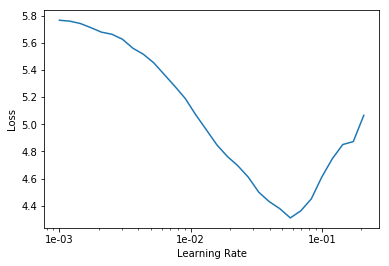

In [201]:
learn.recorder.plot(skip_start=50, skip_end=20)

Show the learning rate plot. The ideal starting spot should be around `1e-2 - 1e-3`.

Fit one cycle with 5 epochs at the learning rate you found, with rate decay 0.2.

In [202]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.039369,0.032376,0.205648,02:10
1,0.041859,0.036230,0.198859,02:15
2,0.035319,0.033891,0.217071,02:14
3,0.026892,0.027117,0.151355,02:17
4,0.013003,0.010541,0.103949,02:16


Save the learner to `l`.

In [203]:
learn.save('l')

Show the losses, skipping the first 7000 batches processed.

Load `l`.

In [205]:
learn.load('l')

Learner(data=TabularDataBunch;

Train: LabelList (842338 items)
x: TabularList
Store 1; DayOfWeek 3; Year 2013; Month 1; Day 2; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 25.0; StoreType c; Assortment a; PromoInterval #na#; CompetitionOpenSinceYear 2008.0; Promo2SinceYear 1900.0; State HE; Week 1; Events #na#; Promo_fwd #na#; Promo_bwd #na#; StateHoliday_fwd #na#; StateHoliday_bwd #na#; SchoolHoliday_fwd #na#; SchoolHoliday_bwd #na#; CompetitionDistance_na False; CloudCover_na False; trend_DE_na True; CompetitionDistance -0.5359; Max_TemperatureC -0.9875; Mean_TemperatureC -0.9821; Min_TemperatureC -0.9180; Max_Humidity 0.8733; Mean_Humidity 0.8387; Min_Humidity 0.8721; Max_Wind_SpeedKm_h -0.4057; Mean_Wind_SpeedKm_h -0.1427; CloudCover 0.2675; trend 0.6815; trend_DE -0.0018; AfterStateHoliday -1.2015; BeforeStateHoliday -1.5081; Promo -0.8979; SchoolHoliday 2.0412; ,Store 1; DayOfWeek 4; Year 2013; Month 1; Day 3; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2

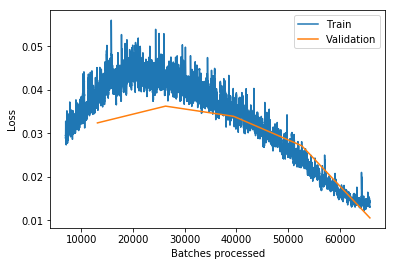

In [206]:
learn.recorder.plot_losses(skip_start=7000)

In [65]:
learn.load('1');

Fit another cycle with 5 epochs and learning rate 3e-4.

In [207]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.014856,0.011262,0.107799,02:21
1,0.013490,0.012389,0.106855,02:20
2,0.012649,0.013832,0.124039,02:20
3,0.011456,0.011123,0.104617,02:25
4,0.010786,0.011012,0.104189,02:20


In [208]:
learn.save('l2')

In [210]:
learn.load('l2')

Learner(data=TabularDataBunch;

Train: LabelList (842338 items)
x: TabularList
Store 1; DayOfWeek 3; Year 2013; Month 1; Day 2; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 25.0; StoreType c; Assortment a; PromoInterval #na#; CompetitionOpenSinceYear 2008.0; Promo2SinceYear 1900.0; State HE; Week 1; Events #na#; Promo_fwd #na#; Promo_bwd #na#; StateHoliday_fwd #na#; StateHoliday_bwd #na#; SchoolHoliday_fwd #na#; SchoolHoliday_bwd #na#; CompetitionDistance_na False; CloudCover_na False; trend_DE_na True; CompetitionDistance -0.5359; Max_TemperatureC -0.9875; Mean_TemperatureC -0.9821; Min_TemperatureC -0.9180; Max_Humidity 0.8733; Mean_Humidity 0.8387; Min_Humidity 0.8721; Max_Wind_SpeedKm_h -0.4057; Mean_Wind_SpeedKm_h -0.1427; CloudCover 0.2675; trend 0.6815; trend_DE -0.0018; AfterStateHoliday -1.2015; BeforeStateHoliday -1.5081; Promo -0.8979; SchoolHoliday 2.0412; ,Store 1; DayOfWeek 4; Year 2013; Month 1; Day 3; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2

Fit another cycle with 5 epochs and lr = 3e-4.

In [ ]:
learn.fit_one_cycle(5, 3e-4)

10th place in the competition was 0.108. How low can you get? 

Get the predictions from the test set and set them to `test_preds`. Set `test_df['Sales']` to the exponentiated values of `test_preds[0].data`, converted to a numpy array, and then call `T[0]`. Why did you have to do `test_preds[0].data`? Why `.T[0]`? Replace `test_df[["Id", "Sales"]]` with an int-ified version of itself. Write it out to a `csv` `rossmann_submission.csv` without an index.